<a href="https://colab.research.google.com/github/penzen/Codes-/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

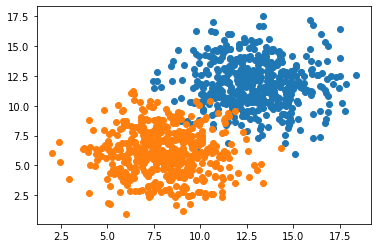

In [ ]:
import numpy as np 
import tensorflow.keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense  # every node is the layer is connected to the presiding node in the layer. 
from tensorflow.keras.optimizers import Adam  # stochastic gradient descent more reasurch needed. 
import matplotlib.pyplot as plt 
%matplotlib inline 

n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])


In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation ='sigmoid')) # the two is for the inputs x1 and x2. 
#sigmoid does it for you
adam = Adam(lr = 0.1) # optimizaion algorithm.  lr is the learning rate. 
model.compile(adam,loss = 'binary_crossentropy' , metrics = ['accuracy'])# matrics juges the performacne at every epoc
h = model.fit(x = X,y = y, verbose = 1, batch_size = 50, epochs = 50, shuffle = 'true') #epock itterates through the whole thing
# h trains the model 
# verbose displays the progress bar and prints the performce 
#epoc ittrates through the intrial data set 
# batch size should be suffiecent data size 
#epochs is the amount of time it itterates, thorugh the whole model
# epocs help itteration help with classification of the model 6
# shuffle shuffle the epoc  after each itteration. 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
20/20 [==============================] - 0s 1ms/step - loss: 1.3592 - accuracy: 0.5230
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.6370
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7580
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8150
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8810
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.9070
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.9270
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.9400
Epoch 9/50
20/20 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.9530
Epoch 10/50
20/20 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9540
Epoch 11/50
20/20 [

Text(0.5, 0, 'epoch')

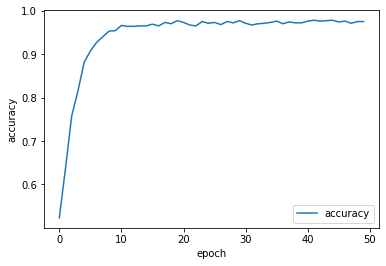

In [ ]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
 
#plt.plot(h.history['loss'])
#plt.legend(['loss'])
#plt.title('loss')
#plt.xlabel('epoch')

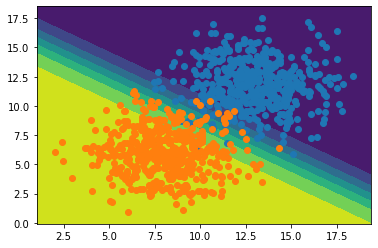

In [25]:
"""
def plot_desision(X,y,model):# x is the data we created(Points), y is the matrix that contains label for the model, 
   x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1 ) #give us the minimun horigontal value in the first c
   y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1 ) # the plus one and the  minus part is to make it more visual pleasing
   xx,yy = np.meshgrid(x_span,y_span) # returns a two 50/ 50 matrix. 
   xx, yy = xx.ravel(), yy.ravel() #ravel makes the raay single dementinal 
   grid = np.c_[xx, yy] # look up coolym
   pred_func = model.predict(grid)
   z = pred_func.reshape(xx.shape) 
   plt.contourf(xx,yy,z)
"""
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
   


plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
#and the third is the sequenbceal model that contains out neaural network model



[[0.79567623]]


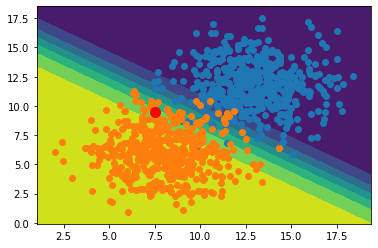

In [29]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5 
y = 9.5 
pre = np.array([[x,y]])
prediction = model.predict(pre)
plt.plot([x],[y], marker = "o",markersize = "10", color = "red")
print(prediction)
